In [10]:
!pip install prophet
!pip install yfinance

  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/82/5a5eee685095a6c1f8968db75bba8536baa8046c970be25e1ac91a843839/yfinance-0.2.33-py2.py3-none-any.whl.metadata
  Obtaining dependency information for frozendict>=2.3.4 from https://files.pythonhosted.org/packages/7a/a2/acaf3f05fdba4458a3a6e01f431952ec57da15ab5f5b9394d74a0d0df3dd/frozendict-2.4.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/2.9 MB ? eta -:--:--
     -- ------------------------------------- 0.2/2.9 MB 3.7 MB/s eta 0:00:01
     ------------ --------------------------- 0.9/2.9 MB 9.4 MB/s eta 0:00:01
     ---------------------------------------  2.9/2.9 MB 20.7 MB/s eta 0:00:01
     ---------------------------------------- 2.9/2.9 MB 18.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: 

In [11]:
# Run 1st

import pandas as pd
import requests
import json
import datetime as dt
from prophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline

In [22]:
# Run 2nd

running_shorts_df = pd.read_csv("resources/running_shorts.csv", skiprows=1, header=None, names=['Month', 'Running Shorts'])
tennis_skirt_df = pd.read_csv('resources/tennis_skirt.csv', skiprows=1, header=None, names=['Month', 'Tennis Skirts'])
lulu_lemon_df = pd.read_csv('resources/lululemon.csv', skiprows=1, header=None, names=['Month', 'lululemon Sales'])

In [4]:
# Run 3rd 

list_of_dfs = [running_shorts_df, tennis_skirt_df, lulu_lemon_df]

def clean_dataframes(dfs_list):
    for df in dfs_list:
        df.drop(0, inplace=True)

clean_dataframes(list_of_dfs)
running_shorts_df, tennis_skirt_df, lulu_lemon_df

(       Month Running Shorts
 1    2014-01             19
 2    2014-02             22
 3    2014-03             29
 4    2014-04             31
 5    2014-05             38
 ..       ...            ...
 116  2023-08             56
 117  2023-09             42
 118  2023-10             33
 119  2023-11             34
 120  2023-12             29
 
 [120 rows x 2 columns],
        Month Tennis Skirts
 1    2014-01             8
 2    2014-02             8
 3    2014-03            10
 4    2014-04             8
 5    2014-05            10
 ..       ...           ...
 116  2023-08            63
 117  2023-09            55
 118  2023-10            42
 119  2023-11            32
 120  2023-12            26
 
 [120 rows x 2 columns],
        Month lululemon Sales
 1    2014-01              23
 2    2014-02              20
 3    2014-03              22
 4    2014-04              20
 5    2014-05              18
 ..       ...             ...
 116  2023-08              63
 117  2023-09         

In [23]:
# RUN 4th

df1 = running_shorts_df 
df2 = tennis_skirt_df
df3 = lulu_lemon_df  

# Merge or concatenate dataframes based on the date
merged_df = pd.merge(df1, df2, on='Month').merge(df3, on='Month')

merged_df['Running Shorts'] = pd.to_numeric(merged_df['Running Shorts'], errors='coerce')
merged_df['Tennis Skirts'] = pd.to_numeric(merged_df['Tennis Skirts'], errors='coerce')
merged_df['lululemon Sales'] = pd.to_numeric(merged_df['lululemon Sales'], errors='coerce')

# Convert 'Date' column to datetime
merged_df['Month'] = pd.to_datetime(merged_df['Month']).dt.date
merged_df['Y4'] = ((merged_df['Running Shorts'] + merged_df['Tennis Skirts'] + merged_df['lululemon Sales']) / 3).astype(int)

# Plot the data
plt.figure(figsize=(10, 6))

# plt.plot(merged_df['Month'], merged_df['Running Shorts'], label='Y1')
# plt.plot(merged_df['Month'], merged_df['Tennis Skirts'], label='Y2')
# plt.plot(merged_df['Month'], merged_df['lululemon Sales'], label='Y3')
# df_home_sales[["inventory", "homes_sold"]].corr()

# Plot the average
plt.plot(merged_df['Month'], merged_df['Y4'], label='Y4')

plt.xlabel('Month')
plt.ylabel('Y Values')
plt.title('Combined Dataframes')
merged_df.head()
plt.legend()
plt.show()

C:\Users\Sean\AppData\Local\Temp\ipykernel_7692\2506824447.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  merged_df['Month'] = pd.to_datetime(merged_df['Month']).dt.date


DateParseError: Unknown datetime string format, unable to parse: Month, at position 0

In [15]:
# Run 5th

stock_and_google_trends_df = merged_df
merged_df

,Month,Running Shorts,Tennis Skirts,lululemon Sales
0,Month,NaN,NaN,NaN
1,2014-01,19.0,8.0,23.0
2,2014-02,22.0,8.0,20.0
3,2014-03,29.0,10.0,22.0
4,2014-04,31.0,8.0,20.0
...,...,...,...,...
116,2023-08,56.0,63.0,63.0
117,2023-09,42.0,55.0,57.0
118,2023-10,33.0,42.0,61.0
119,2023-11,34.0,32.0,100.0


In [21]:
# Run 6th

import yfinance as yf
import pandas as pd

# Replace 'AAPL' with the ticker you're interested in
ticker_symbol = 'CCL'

# Define the start and end dates
start_date = '2014-01-01'
end_date = '2023-12-31'

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Get historical market data
hist = ticker.history(start=start_date, end=end_date, interval="1mo")

# Convert to DataFrame (it's already a DataFrame, but this is for clarity)
df = pd.DataFrame(hist)

df = df.reset_index()

df = df.rename(columns={'Date': 'Month'})

df['Month'] = pd.to_datetime(df['Month']).dt.date
df
stock_df = df[['Month', 'Close']]
stock_df

,Month,Close
0,2014-01-01,32.603550
1,2014-02-01,32.994564
2,2014-03-01,31.696388
3,2014-04-01,32.910324
4,2014-05-01,33.513096
...,...,...
115,2023-08-01,15.820000
116,2023-09-01,13.720000
117,2023-10-01,11.460000
118,2023-11-01,15.060000


In [18]:
# Run 7th
stock_and_google_trends_df = pd.merge(merged_df, stock_df, on='Month')
stock_and_google_trends_df

NameError: name 'stock_df' is not defined

In [17]:
# Run 8th

# Calculate percentage change for 'Stock Price'
stock_and_google_trends_df['Stock Price % Change'] = stock_and_google_trends_df['Close'].pct_change() * 100

# Calculate percentage change for 'Y4'
stock_and_google_trends_df['Y4 % Change'] = stock_and_google_trends_df['Y4'].pct_change() * 100
stock_and_google_trends_df.dropna()

KeyError: 'Close'

In [79]:
# Run 9th

stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].corr()

,Y4 % Change,Stock Price % Change
Y4 % Change,1.000000,0.068027
Stock Price % Change,0.068027,1.000000


<Axes: >

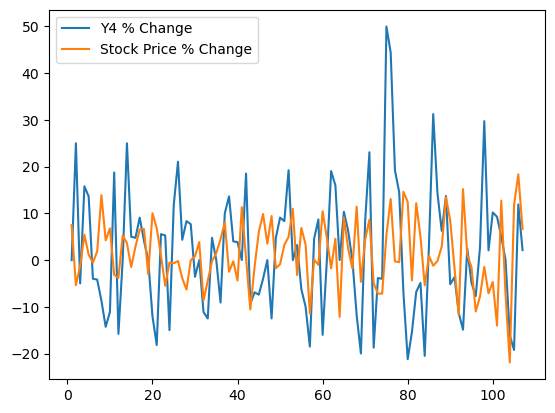

In [80]:
# Run 10th
stock_and_google_trends_df[['Y4 % Change', "Stock Price % Change"]].plot()

In [ ]:
## Prophet Modeling next

In [ ]:
## Next to do: Build ffunction that converts dfs to prophet dfs

In [17]:
# non logi
m = Prophet()

m.fit(running_shorts_df)

future = m.make_future_dataframe(periods=60, freq='M')

forecast = m.predict(future)

m.plot(forecast)

ValueError: Dataframe must have columns "ds" and "y" with the dates and values respectively.

In [ ]:
# Use this if the model predicts values above 100 on google trends data

running_shorts_df['cap'] = 100
running_shorts_df['floor'] = 0

model = Prophet(growth='logistic')
model.fit(running_shorts_df)

future = model.make_future_dataframe(periods=100, freq='M')
future['cap'] = 100
future['floor'] = 0

forecast = model.predict(future)

display(forecast.tail(50))


In [ ]:
m.plot(forecast)

In [ ]:
# Call the Prophet function and store as an object
m = Prophet()
m


In [ ]:
m.fit(lulu_lemon_df)

In [ ]:
# Create a future DataFrame to hold predictions
# Make the prediction go out as far as 720 hours (30 days)
future = m.make_future_dataframe(periods=60, freq='M')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))

In [ ]:
forecast = m.predict(future)
display(forecast.head(10))

In [ ]:
m.plot(forecast)

In [ ]:
lulu_lemon_df.dropna()

In [ ]:

m = Prophet()
m.fit(lulu_df)

In [ ]:
future = m.make_future_dataframe(periods=500, freq='D')

# Review the first and last 10 rows of the DataFrame
display(future.head(10))


In [ ]:
forecast = m.predict(future)
display(forecast.head(10))


In [ ]:
m.plot(forecast)